# Task 2

# The Sparks Foundation Intern 2021

# Nikhil Salvi

# Find optimum number of clusters and represent visually


In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

Importing dataset

In [2]:
iris = sns.load_dataset("iris")

# EDA

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# Descriptive Statistics

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.shape

(150, 5)

In [7]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

We can see that there are no null values in the data, the mean and median seems to be approx equal so likely to be no outliers.

# Vizualization

<AxesSubplot:>

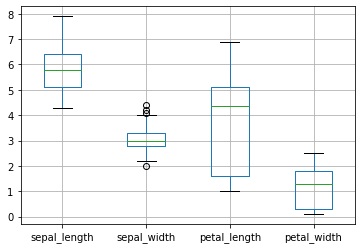

In [10]:
iris.boxplot()

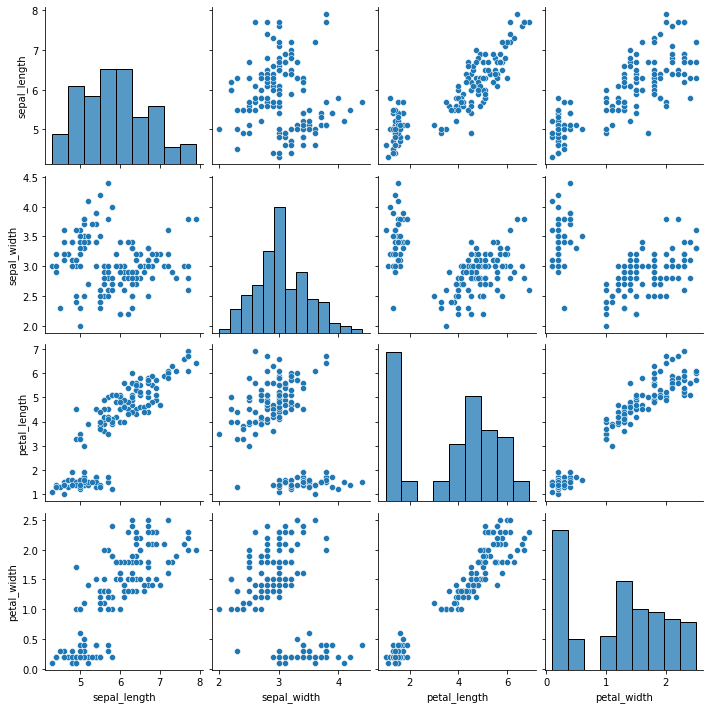

In [11]:
sns.pairplot(iris)

there are otliers in the sepal width but can be ignored , drew pair plot to get a rough understanding of present clusters.

# splitting data for the features

In [12]:
iris_short = iris.drop(columns="species")

# finding optimum clusters

we can see that data gives us 3 clusters naming 'setosa', 'versicolor', 'virginica' , to confirm 3 clusters is the optimum solution using elbow method

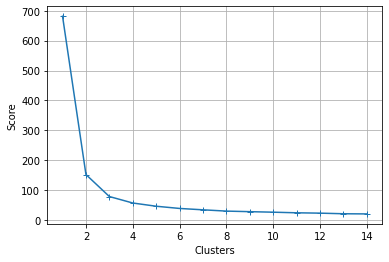

In [13]:
wss =[]
for k in range(1,15):
    cluster = KMeans(n_clusters=k,random_state=42)
    cluster.fit(iris_short)
    wss.append(cluster.inertia_)

plt.grid()
plt.plot(range(1,15),wss,ls='-', marker='+')
plt.xlabel("Clusters")
plt.ylabel("Score")
plt.show();

In above plot, can see a elbow forming on the 3rd cluster, so can confirm to use the 3 cluster to create the model

# Creating model using 3 cluster

In [14]:
cluster = KMeans(n_clusters=3,random_state=42)

pred_cluster = cluster.fit_predict(iris_short)

In [15]:
iris_short["cluster"] = pred_cluster
iris_short.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [16]:
iris_short.tail()

,sepal_length,sepal_width,petal_length,petal_width,cluster
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,0


In [17]:
cluster.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# Vizualisation of the model

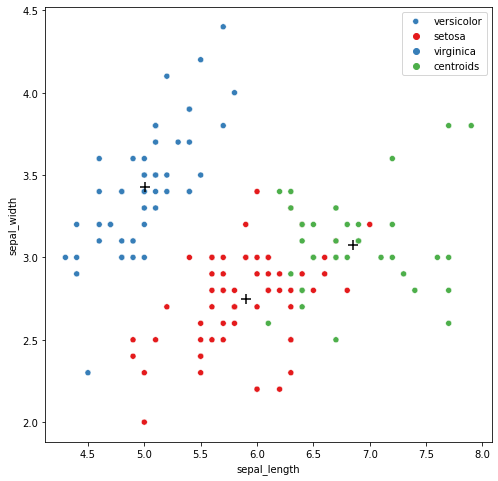

In [18]:
plt.figure(figsize=[8,8])
Plots = sns.scatterplot(x="sepal_length",y="sepal_width",data=iris_short,hue="cluster",palette='Set1')
Plots = plt.scatter(x=cluster.cluster_centers_[:,0],y=cluster.cluster_centers_[:,1],marker='+',color='black',s=100)
plt.legend(labels=["versicolor","setosa","virginica","centroids"])
plt.show();